https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from IPython.display import display
import seaborn as sns
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#import and view dataset 
df = pd.read_csv('Train.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#create the categorical variables 
df['Street'] = np.where((df['Street'] == 'Pave'), 1, 0) 
df['Utilities'] = np.where((df['Utilities'] == 'AllPub'), 1, 0)  
df['CentralAir'] = np.where((df['CentralAir'] == 'Y'), 1, 0)

df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,1,NaN,IR1,Lvl,1,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,1,NaN,IR1,Lvl,1,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,1,NaN,IR1,Lvl,1,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,1,NaN,IR1,Lvl,1,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,1,NaN,IR1,Lvl,1,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,1,NaN,Reg,Lvl,1,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


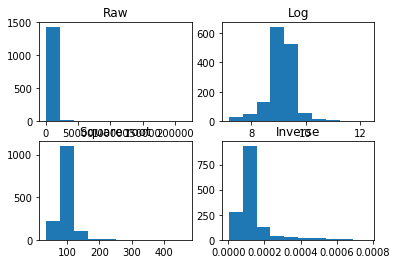

ValueError: Length of values does not match length of index

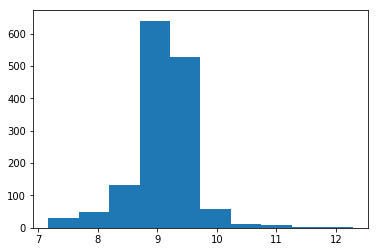

In [6]:
#check for normal distribution amongst continous variables of interest 
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['LotArea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['LotArea']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['LotArea'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['LotArea']+1))
plt.title('Inverse')
plt.show()

#we'll take the log for lot area instead 

df['LotArea'] = plt.hist(np.log(df['LotArea']+1))

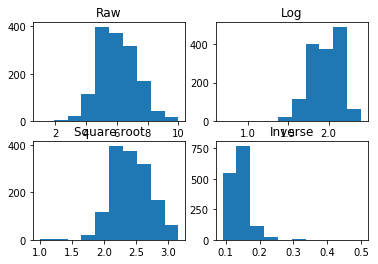

In [7]:
#check for normal distribution amongst continous variables 
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['OverallQual'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['OverallQual']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['OverallQual'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['OverallQual']+1))
plt.title('Inverse')
plt.show()

#we'll the raw data 

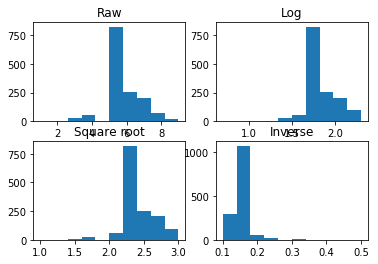

In [8]:
#check for normal distribution amongst continous variables 
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['OverallCond'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['OverallCond']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['OverallCond'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['OverallCond']+1))
plt.title('Inverse')
plt.show()

#we'll keep the data as is here as well

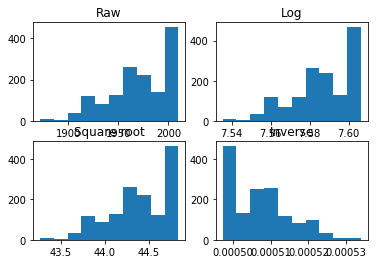

In [9]:
#check for normal distribution amongst continous variables 
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['YearBuilt'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['YearBuilt']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['YearBuilt'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['YearBuilt']+1))
plt.title('Inverse')
plt.show()

#we'll keep as is again 

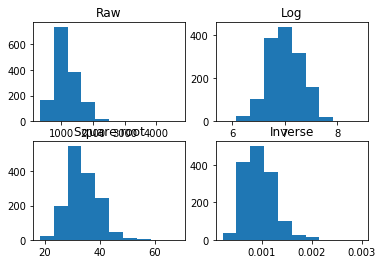

In [10]:
#check for normal distribution amongst continous variables 
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['1stFlrSF'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['1stFlrSF']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['1stFlrSF'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['1stFlrSF']+1))
plt.title('Inverse')
plt.show()

df['1stFlrSF'] = (np.log(df['1stFlrSF']+1))

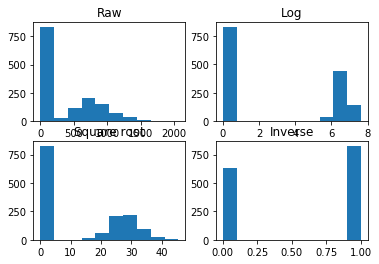

In [11]:
#check for normal distribution amongst continous variables 
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['2ndFlrSF'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['2ndFlrSF']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['2ndFlrSF'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['2ndFlrSF']+1))
plt.title('Inverse')
plt.show()

#keep as is 

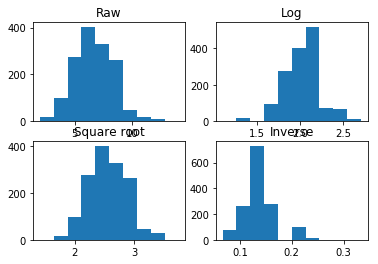

In [12]:
#check for normal distribution amongst continous variables 
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['TotRmsAbvGrd'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['TotRmsAbvGrd']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['TotRmsAbvGrd'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['TotRmsAbvGrd']+1))
plt.title('Inverse')
plt.show()

#take sqrt of data 
df['TotRmsAbvGrd'] = (np.sqrt(df['TotRmsAbvGrd'].dropna()))

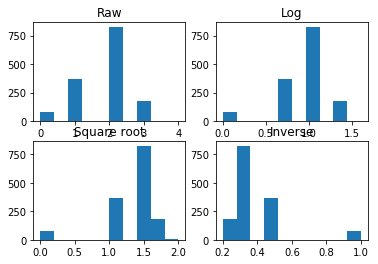

In [13]:
#check for normal distribution amongst continous variables 
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['GarageCars'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['GarageCars']+1))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['GarageCars'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/(df['GarageCars']+1))
plt.title('Inverse')
plt.show()

#keep as is 


In [14]:
regr = linear_model.LinearRegression()
Y = df['SalePrice']
X = df[['Street','Utilities','CentralAir', 'LotArea', 'OverallQual', 'OverallCond','YearBuilt','1stFlrSF','2ndFlrSF','TotRmsAbvGrd', 'GarageCars']] 
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 2.48650435e+04  4.31459937e+04 -8.18364928e+03  7.44078883e-01
  2.19956607e+04  6.48586937e+03  4.72929611e+02  9.53651437e+04
  5.05901347e+01 -8.40036116e+03  1.19970675e+04]

Intercept: 
 -1675556.4881480297

R-squared:
0.7779000088750947


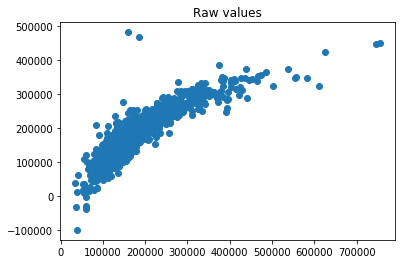

In [15]:
#check for assumption 1, linear relationships 
outcome = Y
predicted = regr.predict(X).ravel()

plt.scatter(outcome, predicted)
plt.title('Raw values')
plt.show()

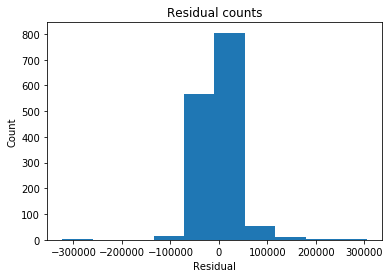

In [16]:
#check assumption 2, multivariate normality 
residual = outcome - predicted

# looks pretty good! 
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

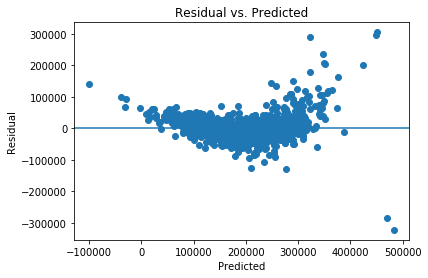

In [17]:
#check assumption three homoscedasticity  
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [18]:
#assumption #4, low multicollinearity
correlation_matrix = X.corr()
display(correlation_matrix)

,Street,Utilities,CentralAir,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,TotRmsAbvGrd,GarageCars
Street,1.000,-0.002,0.070,-0.197,0.059,0.043,0.021,0.005,0.047,0.048,-0.020
Utilities,-0.002,1.000,-0.007,-0.010,0.002,-0.010,0.012,-0.016,0.021,-0.009,-0.008
CentralAir,0.070,-0.007,1.000,0.050,0.272,0.119,0.382,0.172,-0.012,0.045,0.234
LotArea,-0.197,-0.010,0.050,1.000,0.106,-0.006,0.014,0.283,0.051,0.190,0.155
OverallQual,0.059,0.002,0.272,0.106,1.000,-0.092,0.572,0.456,0.295,0.433,0.601
OverallCond,0.043,-0.010,0.119,-0.006,-0.092,1.000,-0.376,-0.137,0.029,-0.059,-0.186
YearBuilt,0.021,0.012,0.382,0.014,0.572,-0.376,1.000,0.277,0.010,0.103,0.538
1stFlrSF,0.005,-0.016,0.172,0.283,0.456,-0.137,0.277,1.000,-0.218,0.411,0.448
2ndFlrSF,0.047,0.021,-0.012,0.051,0.295,0.029,0.010,-0.218,1.000,0.605,0.184
TotRmsAbvGrd,0.048,-0.009,0.045,0.190,0.433,-0.059,0.103,0.411,0.605,1.000,0.368
